In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import classification_report

In [43]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Heart%20Attack%20Analysis%20%26%20Prediction%20Dataset/heart.csv")

In [44]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
df.shape

(303, 14)

In [46]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Text(0.5, 1.0, 'Sex')

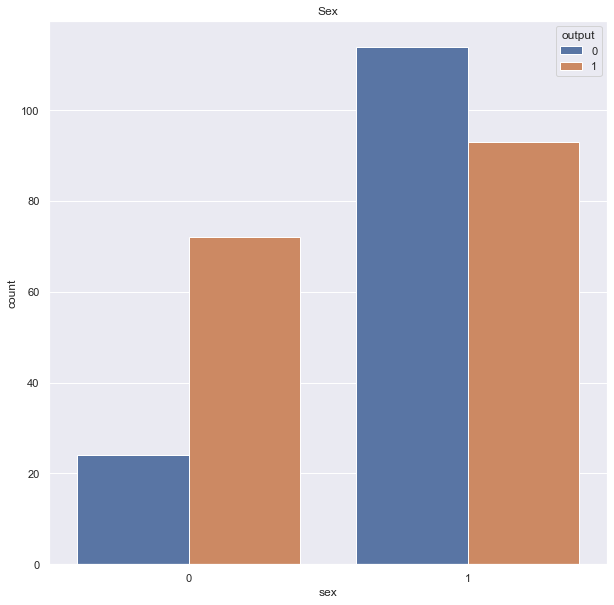

In [48]:
sns.countplot(x="sex", hue="output", data=df)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Sex")

Text(0.5, 1.0, 'cp')

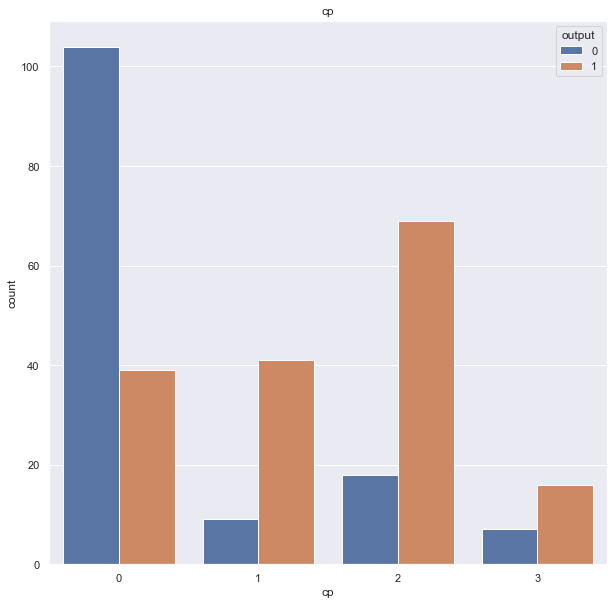

In [49]:
sns.countplot(x='cp',hue='output',data=df)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("cp")

Text(0.5, 1.0, 'fbs')

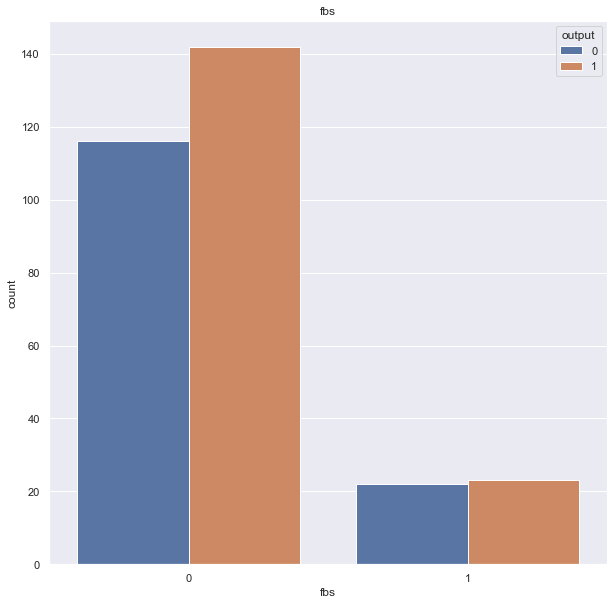

In [50]:
sns.countplot(x='fbs',hue='output',data=df)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("fbs")

Text(0.5, 1.0, 'restecg')

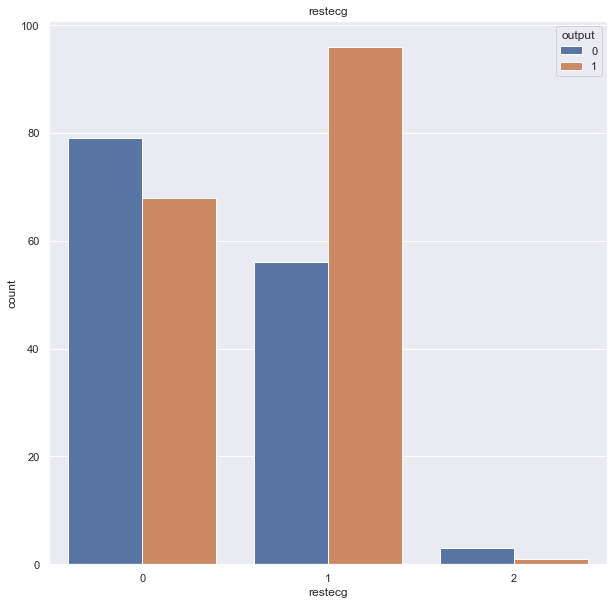

In [51]:
sns.countplot(x='restecg',hue='output',data=df)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("restecg")

Text(0.5, 1.0, 'exang')

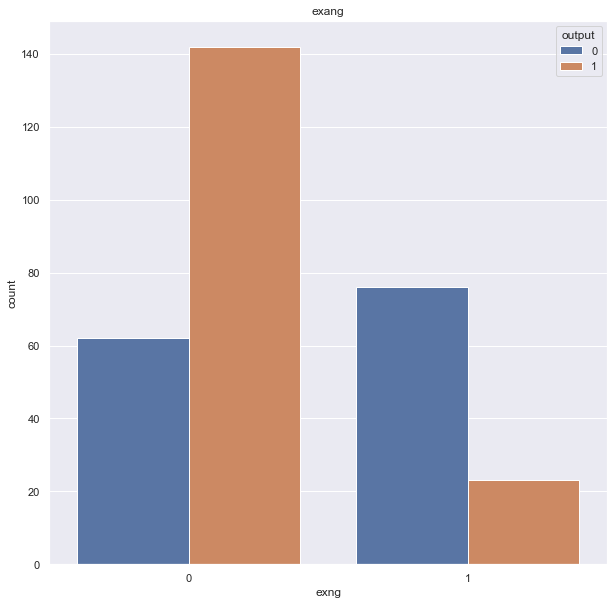

In [52]:
sns.countplot(x='exng',hue='output',data=df)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("exang")

Text(0.5, 1.0, 'slp')

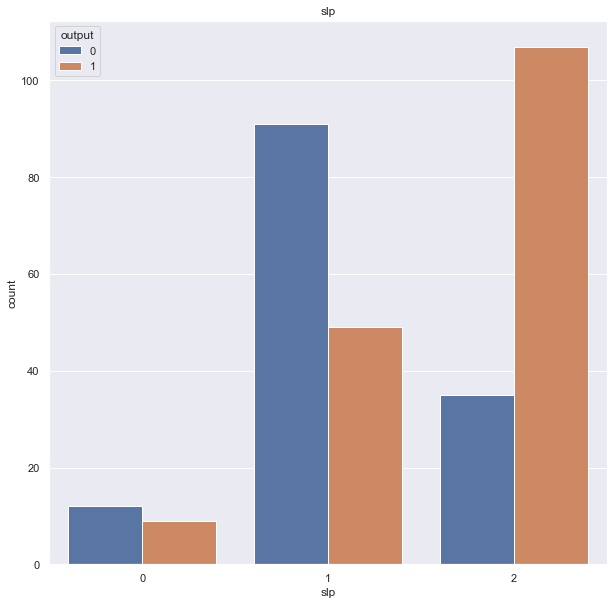

In [53]:
sns.countplot(x='slp',hue='output',data=df)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("slp")

Text(0.5, 1.0, 'caa')

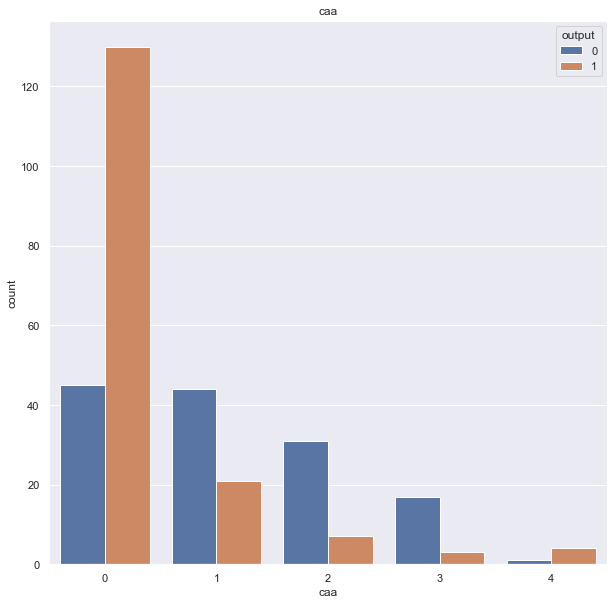

In [54]:
sns.countplot(x='caa',hue='output',data=df)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("caa")

Text(0.5, 1.0, 'thal')

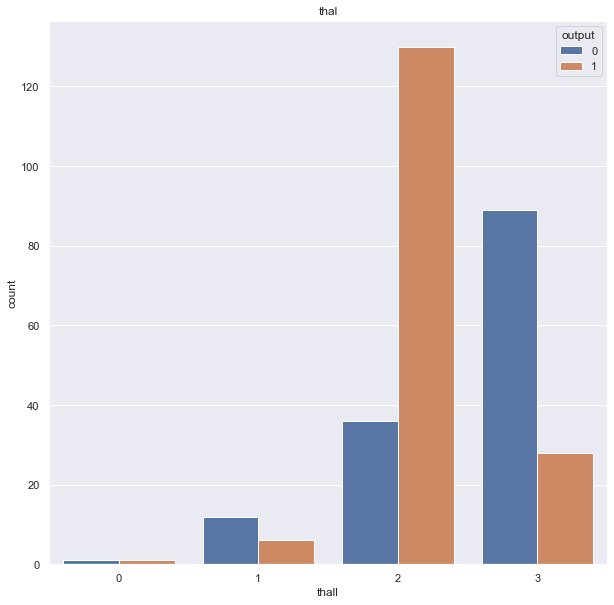

In [55]:
sns.countplot(x='thall',hue='output',data=df)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("thal")

Text(0.5, 1.0, 'Age')

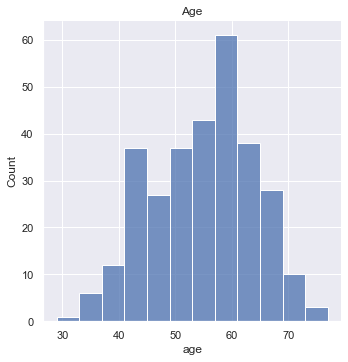

In [56]:
sns.displot(df, x="age")
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Age")

Text(0.5, 1.0, 'trestbps')

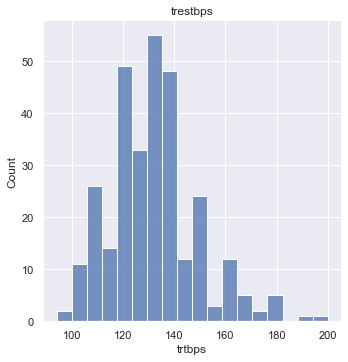

In [57]:
sns.displot(df, x="trtbps")
sns.set(rc={'figure.figsize':(10,10)})
plt.title("trestbps")

Text(0.5, 1.0, 'chol')

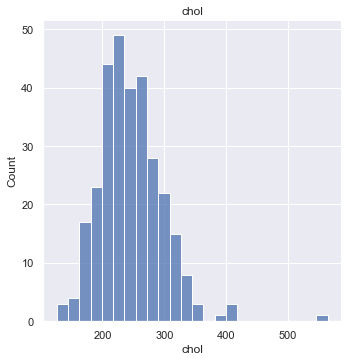

In [58]:
sns.displot(df, x="chol")
sns.set(rc={'figure.figsize':(10,10)})
plt.title("chol")

Text(0.5, 1.0, 'thalach')

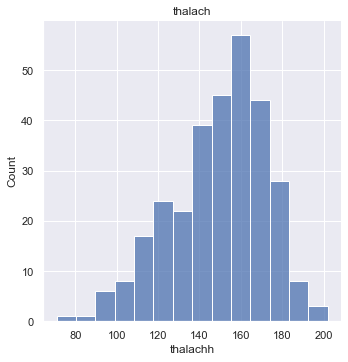

In [59]:
sns.displot(df, x="thalachh")
sns.set(rc={'figure.figsize':(10,10)})
plt.title("thalach")

Text(0.5, 1.0, 'oldpeak')

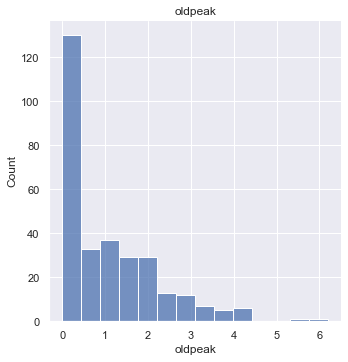

In [60]:
sns.displot(df, x="oldpeak")
sns.set(rc={'figure.figsize':(10,10)})
plt.title("oldpeak")

In [61]:
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'], drop_first = True)
df.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [62]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak"]
for i in numeric_list:
    Q1 = np.percentile(df.loc[:, i],25)
    Q3 = np.percentile(df.loc[:, i],75)
    
    IQR = Q3 - Q1
    
    upper = np.where(df.loc[:, i] >= (Q3 + 2.5*IQR))
    lower = np.where(df.loc[:, i] <= (Q1 - 2.5*IQR))
    
    df.drop(upper[0], inplace = True)
    df.drop(lower[0], inplace = True)

In [63]:
df.shape

(298, 23)

In [64]:
y = df["output"].values

In [65]:
X = (df.drop(columns='output')).values

In [66]:
print('had a heart attack',(y == 1).sum())
print('did not have a heart attack',len(y)-(y == 1).sum())

had a heart attack 164
did not have a heart attack 134


In [67]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25,random_state=42)

In [68]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [69]:
bce = BinaryCrossentropy()

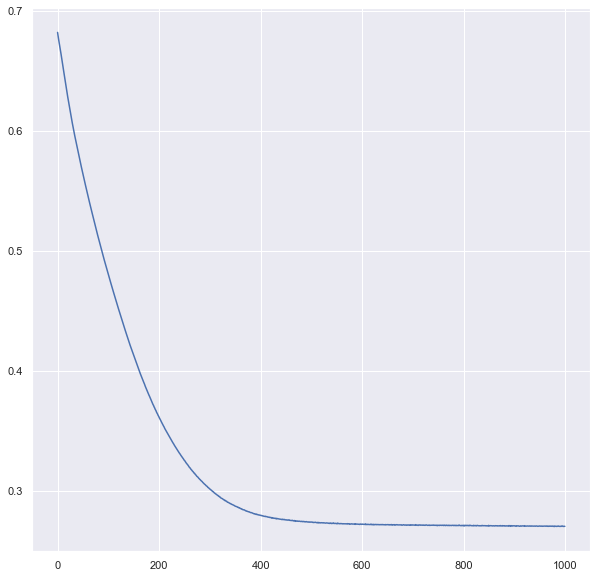

In [70]:
model = 0
model = Sequential()
model.add(Dense(1,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy')
model.fit(X_train_scaled,y_train,epochs=1000,verbose=0)
J_list = model.history.history['loss']
plt.plot(J_list)

In [71]:
y_val_hat = model.predict(X_val_scaled)
print('Validation error =',bce(y_val.reshape(-1,1),y_val_hat).numpy())

y_train_hat = model.predict(X_train_scaled)
print('Training error =',bce(y_train.reshape(-1,1),y_train_hat).numpy())

3/3 [==============================] - 0s 2ms/step
Validation error = 0.41031095
7/7 [==============================] - 0s 1ms/step
Training error = 0.26953292


In [72]:
y_hat_cat = 1*(model.predict(X_train_scaled) > 0.5)
print(classification_report(y_train,y_hat_cat))

7/7 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       103
           1       0.90      0.93      0.92       120

    accuracy                           0.91       223
   macro avg       0.91      0.91      0.91       223
weighted avg       0.91      0.91      0.91       223

